<img src= 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTsGJLCnoRXMJENhWMl4D4pVh6mL97ctKrIKQ&s'>

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRpIq8lm3whwYqce_q4n6gqZ9q1yzu5E5m2Kg&s'>

<img src ='https://www.researchgate.net/publication/266281138/figure/fig8/AS:669511418118149@1536635369450/Blurred-image-of-a-moving-car.ppm'>

## **주성분분석(PCA, Principal Component Analysis)**
- 고차원의 데이터를 저차원으로 축소하면서 데이터의 중요한 패턴을 유지하는 통계 기법입니다. PCA는 데이터의 분산을 최대화하는 축을 찾아 데이터를 새로운 좌표계로 변환합니다. 이를 통해 데이터의 차원을 줄이고, 시각화나 분석을 용이하게 합니다.
- **아래 그림의 의미(주성분의 선형식과 Loadings) : 수직선과 수평선의 경우**

<img src='https://wikidocs.net/images/page/34042/pca_new.jpg'>

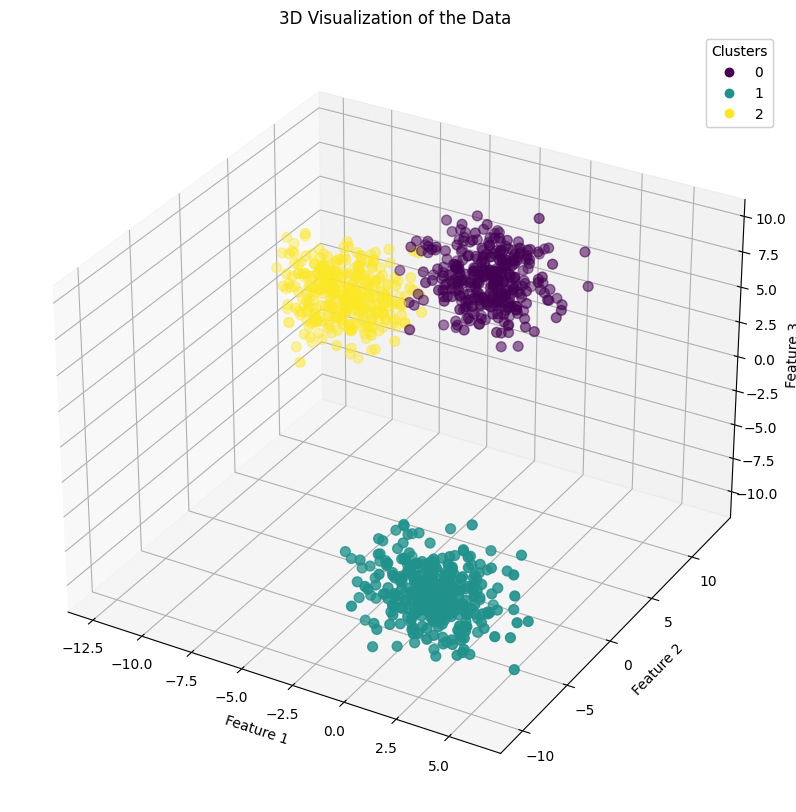

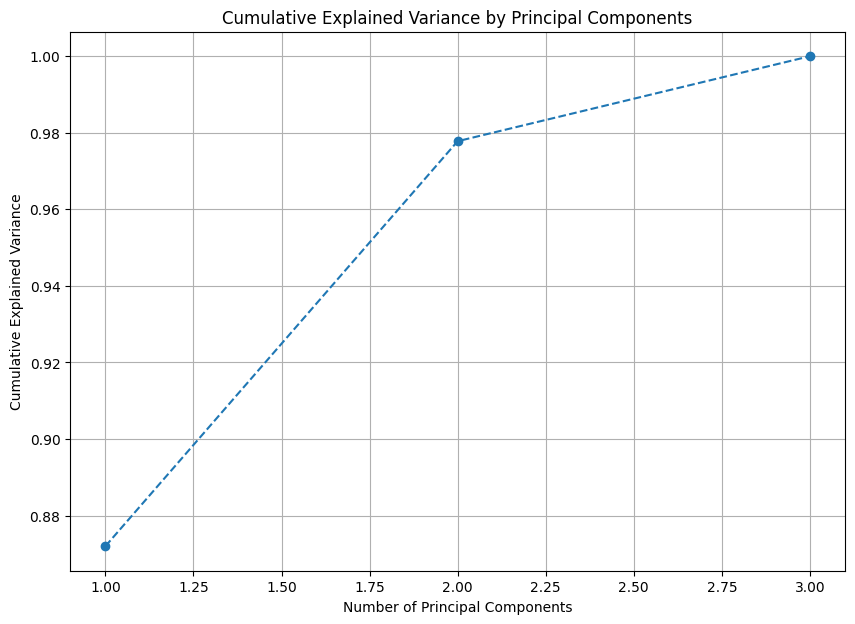

<ipython-input-1-fccf522fb64b>:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset[:, 0], subset[:, 1], s=50, label=f'Cluster {cluster}', cmap='viridis')


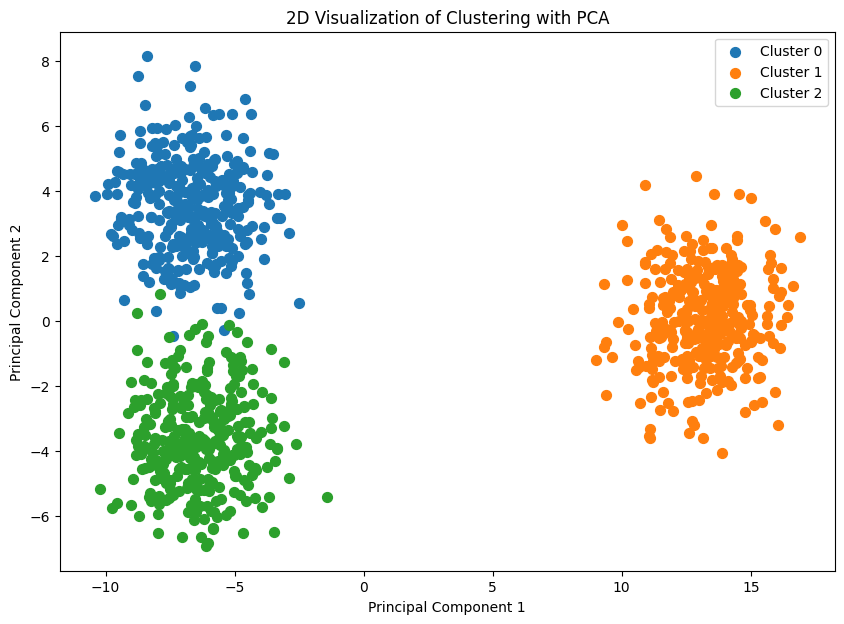

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import pandas as pd

# 3개 변수로 구성된 데이터 생성
n_samples = 1000
n_features = 3
n_clusters = 3
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42, cluster_std=1.5)

# 3차원 시각화
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', s=50)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title('3D Visualization of the Data')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

# 주성분분석(PCA) 적용
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 주성분의 설명 분산 비율
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# 주성분의 누적기여율을 보여주는 그래프
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# 2차원 시각화 (첫 두 개의 주성분)
plt.figure(figsize=(10, 7))
for cluster in range(n_clusters):
    subset = X_pca[y == cluster]
    plt.scatter(subset[:, 0], subset[:, 1], s=50, label=f'Cluster {cluster}', cmap='viridis')

plt.legend()
plt.title('2D Visualization of Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## **주성분분석의 주요 단계**
- **데이터 정규화**: PCA를 적용하기 전에 데이터의 각 특징을 정규화하여 평균이 0, 분산이 1이 되도록 합니다. 이는 데이터의 크기 차이로 인한 영향을 줄이기 위함입니다.
- 공분산 행렬 계산: 데이터의 공분산 행렬을 계산하여 특징들 간의 분산과 상관관계를 파악합니다.
- 고유값 및 고유벡터 계산: 공분산 행렬의 고유값과 고유벡터를 계산합니다. 고유값은 각 주성분의 중요도를 나타내고, 고유벡터는 주성분의 방향을 나타냅니다.
-**주성분 선택**: **고유값이 큰 순서대로 고유벡터를 정렬하고, 상위의 주성분을 선택**합니다. 선택된 주성분의 수는 원하는 차원 축소의 정도에 따라 결정됩니다.
데이터 변환: 원본 데이터를 선택된 주성분 벡터 공간으로 변환하여 저차원 데이터를 생성합니다.

<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Eigenvectors_of_a_linear_operator.gif/300px-Eigenvectors_of_a_linear_operator.gif'>

**[고유값과 고유벡터](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)**

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# USArrests 데이터셋 로드
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv")
df.head()

,Murder,Assault,UrbanPop,Rape,State
0,13.2,236,58,21.2,Alabama
1,10.0,263,48,44.5,Alaska
2,8.1,294,80,31.0,Arizona
3,8.8,190,50,19.5,Arkansas
4,9.0,276,91,40.6,California


## **[다변량 산점도](https://seaborn.pydata.org/examples/scatterplot_matrix.html)**

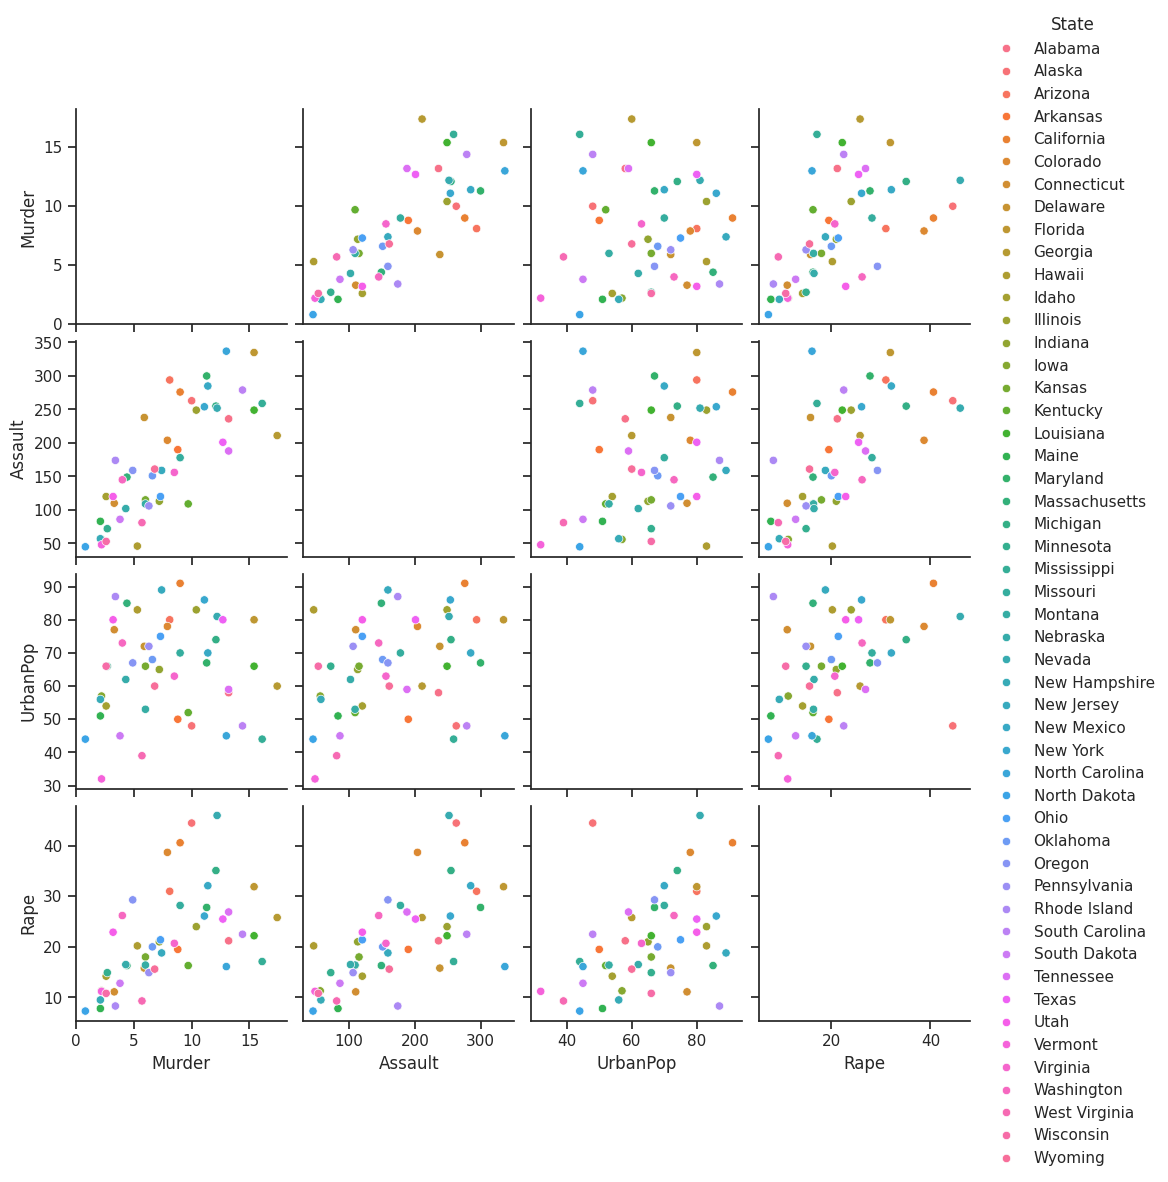

In [3]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df, hue="State")

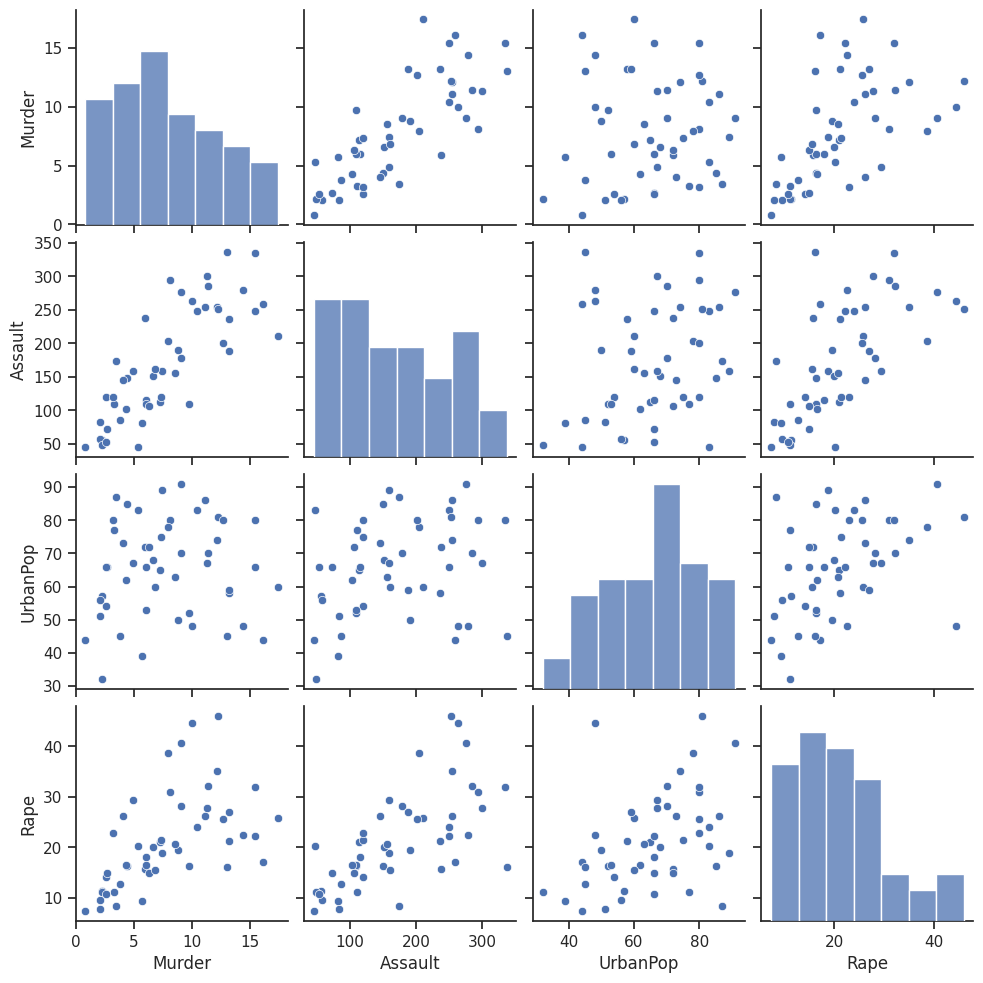

In [4]:
sns.pairplot(df.drop(columns=["State"]))

In [5]:
# 주 이름을 제외한 나머지 수치 데이터만 추출
numeric_data = df.drop(columns=['State'])

# 데이터 표준화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_data)
pd.DataFrame(df_scaled).head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


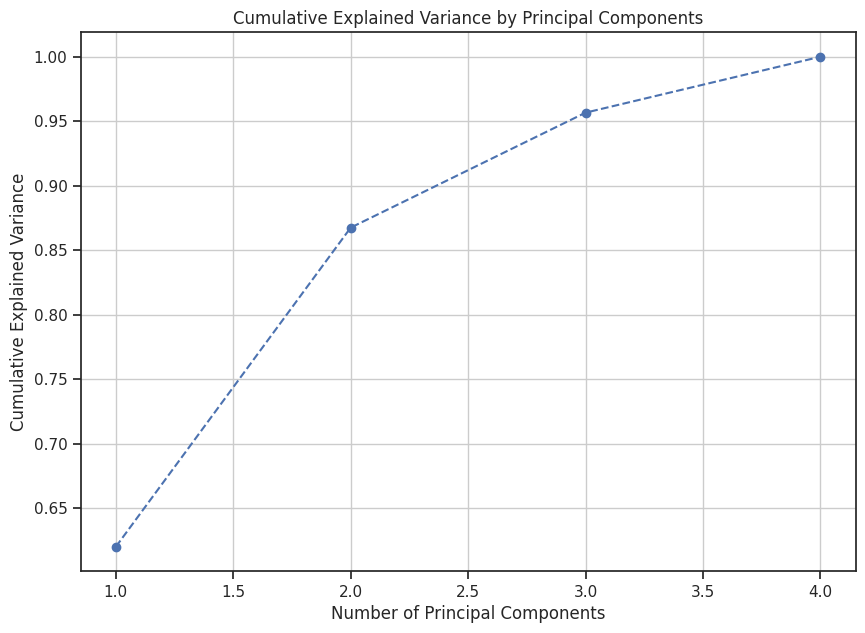

In [6]:

# 주성분분석(PCA) 적용
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# 주성분의 설명 분산 비율
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
df_pca['State'] = df['State']

# 주성분의 누적기여율을 보여주는 그래프
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


### **각 주성분(PC)과 원래 변수 간의 관계를 보여줍니다. 이 데이터프레임을 사용하여 주성분이 원래 변수에 얼마나 영향을 미치는지 분석**

In [7]:
import pandas as pd
import numpy as np
# 로딩 값 계산
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# 로딩 데이터프레임 생성
# Use the columns from numeric_data as the index
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=numeric_data.columns)

# 로딩 데이터프레임 출력
loadings_df

,PC1,PC2,PC3,PC4
Murder,0.852545,0.420259,-0.205829,0.273115
Assault,0.927768,0.188920,-0.161745,-0.312735
UrbanPop,0.442565,-0.877144,-0.228016,0.056319
Rape,0.864528,-0.168150,0.493277,0.037451


## **주성분의 선형식으로 각 지역별로 얻은 결과를 계산**

In [8]:
state_pc_combinations = []

for state in df['State'].unique():
    state_data = df_pca[df_pca['State'] == state]
    for i in range(1, len(df_pca.columns)):
        # Select the loadings for the current PC and all features
        pc_loadings = loadings_df[f'PC{i}']

        # Select the values for the current PC for the current state
        pc_values = state_data[f'PC{i}']

        # Calculate the dot product (use sum of products if pc_values is a single element Series)
        if len(pc_values) == 1:
            pc_coef = (pc_loadings * pc_values.values).sum()
        else:
            pc_coef = pc_loadings.dot(pc_values)

        state_pc_combinations.append({
            'State': state,
            f'PC{i}': pc_coef
        })

df_state_pc_combinations = pd.DataFrame(state_pc_combinations)
df_state_pc_combinations.groupby(by='State').sum()

,PC1,PC2,PC3,PC4
State,,,,
Alabama,3.042842,-0.494290,0.045454,0.008462
Alaska,6.020867,-0.468044,-0.208718,-0.023750
Arizona,5.443601,0.325323,-0.005605,-0.045197
Arkansas,-0.436622,-0.488360,-0.011722,-0.009899
California,7.792551,0.672897,-0.061240,-0.018519
Colorado,4.676070,0.430688,-0.112033,0.000079
Connecticut,-4.194696,0.474898,0.065813,-0.006415
Delaware,0.147298,0.141894,0.073525,-0.047760
Florida,9.302484,-0.017108,0.059017,-0.005214


## **제 1, 2 주성분으로 시각화**



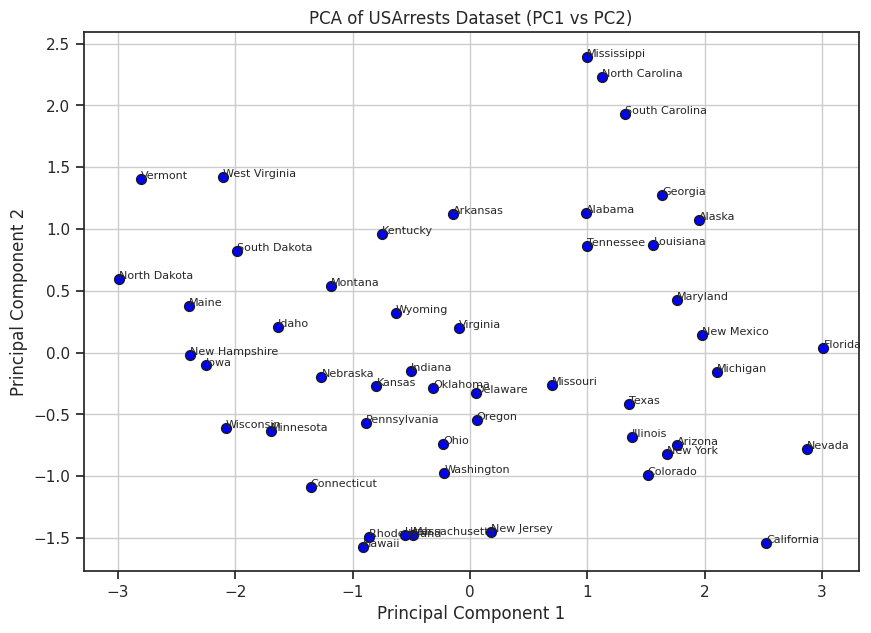

In [9]:
# 주성분 2개로 변환한 데이터 시각화
plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c='blue', edgecolor='k', s=50)

for i, txt in enumerate(df_pca['State']):
    plt.annotate(txt, (df_pca['PC1'][i], df_pca['PC2'][i]), fontsize=8)

plt.title('PCA of USArrests Dataset (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## **PCA의 목적**
- 차원 축소: 데이터의 중요한 정보를 유지하면서 차원을 줄여서 계산 효율성을 높입니다.
- 시각화: 고차원의 데이터를 2차원 또는 3차원으로 축소하여 시각적으로 분석할 수 있습니다.
- 노이즈 제거: 데이터의 분산이 적은 차원을 제거하여 노이즈를 줄입니다.
특징 추출: 데이터의 주요 특징을 추출하여 모델 성능을 향상시킬 수 있습니다.

### **[PythonDataScienceHandbook-principal-component-analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)**